# scikit-learn中的SVM

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

iris = datasets.load_iris()

X = iris.data
y = iris.target

# 为方便可视化，只取前2个特征；
# 暂时只处理2分类问题，所以只取2个类别
X = X[y<2, :2]
y = y[y<2]

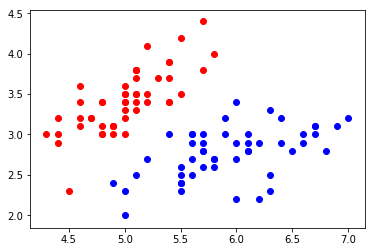

In [3]:
plt.scatter(X[y==0,0], X[y==0,1], color='red')
plt.scatter(X[y==1,0], X[y==1,1], color='blue')
plt.show()

## svm前必须对数据进行标准化处理

### 我们只是想看分类结果的可视化，不需要对未知数据进行预测，所以就不区分训练集与测试集

In [4]:
from sklearn.preprocessing.data import StandardScaler

standard_scaler = StandardScaler()
standard_scaler.fit(X)
X_standard = standard_scaler.transform(X)

In [5]:
from sklearn.svm.classes import LinearSVC

# C取值越大，就越倾向于是一个hard margin
svc = LinearSVC(C=1e9)
svc.fit(X_standard, y)

LinearSVC(C=1000000000.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

## 画出决策边界

/usr/local/seamonster/MachineLearningClassicAlgorithmEnv/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


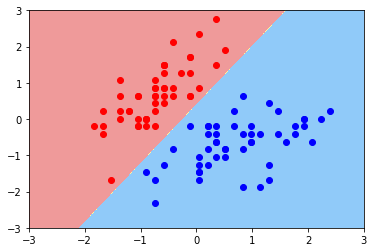

In [6]:
from playML.plot_utils import plot_decision_boundary
plot_decision_boundary(svc, axis=[-3,3,-3,3])
plt.scatter(X_standard[y==0,0], X_standard[y==0,1], color='red')
plt.scatter(X_standard[y==1,0], X_standard[y==1,1], color='blue')
plt.show()

## 画出决策边界（C=0.01）

In [7]:
svc_2 = LinearSVC(C=0.01)
svc_2.fit(X_standard, y)

LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

/usr/local/seamonster/MachineLearningClassicAlgorithmEnv/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


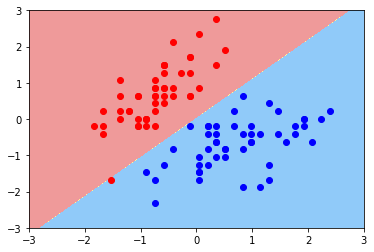

In [8]:
plot_decision_boundary(svc_2, axis=[-3,3,-3,3])
plt.scatter(X_standard[y==0,0], X_standard[y==0,1], color='red')
plt.scatter(X_standard[y==1,0], X_standard[y==1,1], color='blue')
plt.show()

### SVM也是有系数的

In [9]:
svc.coef_

array([[ 4.03239325, -2.49296451]])

In [10]:
svc.intercept_

array([ 0.95367834])

可以看到系数和截距都是数组，这是因为sklearn已经预先为我们处理了使svm可以处理多分类任务，每多一个分类就等于多一条线/平面/超平面，于是系数和截距的数组就多一个元素。

## 增加绘制margin的方法

In [11]:
from playML.plot_utils import plot_svc_decision_boundary

### 画出hard margin的margin

/usr/local/seamonster/MachineLearningClassicAlgorithmEnv/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


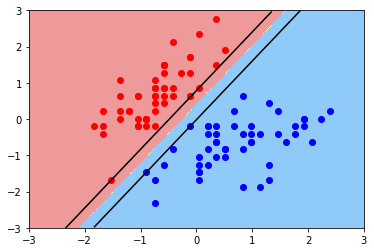

In [12]:
plot_svc_decision_boundary(svc, axis=[-3,3,-3,3])
plt.scatter(X_standard[y==0,0], X_standard[y==0,1], color='red')
plt.scatter(X_standard[y==1,0], X_standard[y==1,1], color='blue')
plt.show()

### 画出soft margin的margin

/usr/local/seamonster/MachineLearningClassicAlgorithmEnv/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


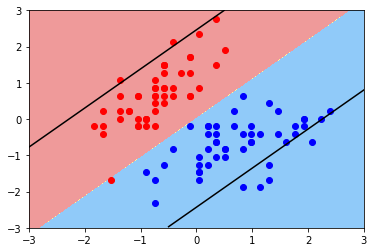

In [13]:
plot_svc_decision_boundary(svc_2, axis=[-3,3,-3,3])
plt.scatter(X_standard[y==0,0], X_standard[y==0,1], color='red')
plt.scatter(X_standard[y==1,0], X_standard[y==1,1], color='blue')
plt.show()